In [31]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm 
import matplotlib.animation as anim

In [32]:
## Para crear una clase con objetos relacionados

class Particle():
    
    def __init__(self, x0, v0, a0, t, m, radio, Id):   #Se trata del constructor de clase ''cómo construir el objeto''
                                                        #Siempre lleva el self porque hace referencia al objeto en creación
        self.dt = t[1] - t[0] #Paso del tiempo, es siempre constante
        self.r = x0     #Inicializar atributos
        self.v = v0  
        self.a = a0  
        
        self.rVector = np.zeros( (len(t),len(x0)) )    #Inicializar una matriz
        self.vVector = np.zeros( (len(t),len(v0)) )
        self.aVector = np.zeros( (len(t),len(a0)) )
        
        self.m = m
        self.radio = radio
        self.Id = Id
        
    def Evolution(self,i):         #Ya es un método de la clase, con el self toma todo lo relacionado con el objeto
        
        self.setPosition(i,self.r)
        self.setVelocity(i,self.v)
        
        #Ecuaciones diferenciales según método de Euler
        
        self.r += self.dt*self.v     
        self.v += self.dt*self.a
    
    def CheckWallLimits(self, limits, dim=2):
        
        for i in range(dim):
            
            if self.r[i] + self.radio > limits[i]:
                
                self.v[i] = - self.v[i]
            
            if self.r[i] - self.radio < - limits[i]:
                
                self.v[i] = - self.v[i]
                
    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]]) # initial condition
                
        for i in range(1,len(self.rVector)):
            
            if i%factor == 0:
                
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                
    #Setters: Permite fijar los atributos, son métodos que no deberían retonar
    
    def setPosition(self, i, r):
        
        self.rVector[i] = r
        
    def setVelocity(self, i, v):
        self.vVector[i] = v
        
    #Getters: Ver los valores de los atributos, son métodos que normalmente retornan algo
    
    def GetR(self):
        
        return self.radio
    
    def GetPositionVector(self):
        
        return self.rVector
    
    def GetRPositionVector(self):
        
        return self.RrVector
        
    def GetVelocityVector(self):
        
        return self.vVector

In [45]:
#Discretización - Siempre existe ya que no se puede resolver de manera continua o exacta

dt = 0.01
tmax = 4
t = np.arange(0, tmax + dt, dt) #como un linspace pero en arrays

In [34]:
## Para crear un objeto

x0 = np.array([0.])     #Propiedades del objeto
v0 = np.array([20.])
a0 = np.array([2.])

p = Particle(x0, v0, a0, t, 1, 1, 1) #Aquí es cuando se crea la partícula

x0 = np.array([0.])

p1 = Particle(x0, v0, a0, t, 1, 1, 1) # Aquí se crea la segunda partícula

print(p, p1) #Brinda la información ''se creó un objeto que pertenece a la clase partícula y el lugar de la memoria dónde está. 
                #Van a tener direcciones distintas, permite modificar las propiedades de una sin modificar las demás

<__main__.Particle object at 0x0000026CA3939820> <__main__.Particle object at 0x0000026CA38CADF0>


In [35]:
## Para llamar atributos, no debería solicitarse así.

p1.v #Solicita la velocidad, se llama no como lo que pide el constructor sino como se declara con self.bla
        #. es un direccionador, por eso se usa para llamar atributos
    

array([20.])

<IPython.core.display.Javascript object>


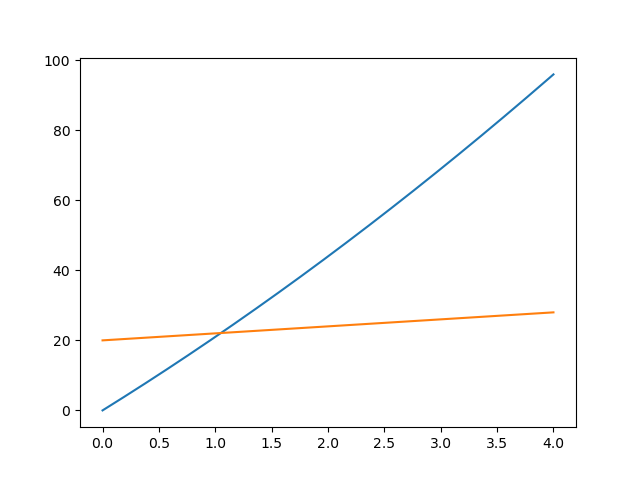

In [36]:
##Uso de un servicio (usar método de evolución)

for i in range(len(t)): #guarda las posiciones en la evolución
    
    p.setPosition(i,p.r)
    p.setVelocity(i,p.v)
    p.Evolution(i)
    
plt.plot(t,p.rVector) #Grafica la evolución temporal de r y v
plt.plot(t,p.vVector)

In [46]:
#Para crear varios objetos en proceso de simulación
#Esto si ya es una función, no un método ni servicio

def GetParticles(NParticles, Limit, Velo, Dim = 2, dt = 0.1):      #Genera las partículas
    
    Particles_ = []
    
    for i in range(NParticles):
        
        x0 = np.random.uniform(-Limit+1.0, Limit-1.0, size=Dim) #genera posiciones aleatorias de la dimensión especificada
        v0 = np.random.uniform(-Velo, Velo, size=Dim) #x0 Tienen una tolerancia que en realidad debería ser el radio de la partícula
        a0 = np.zeros(Dim)
        
        p = Particle(x0,v0,a0,t,1.,1.,i)
        
        Particles_.append(p)
        
    return Particles_     

In [38]:
#Simulación de partículas y los limites del contenedor
limits = np.array([20.,20.])

def RunSimulation(t, NParticles=100, Velo=6):
    
    Particles = GetParticles(NParticles,limits[0],Velo=Velo,dt=dt)
    
    for it in tqdm(range(len(t))):     #tqdm gestiona cuanto se trada en hacer el forloop temporal
        
        for i in range(len(Particles)):
            
            Particles[i].CheckWallLimits(limits)
            Particles[i].Evolution(it)
            
    return Particles

In [39]:
#Para realizar la simulación

Particles = RunSimulation(t,NParticles=30,Velo=50)

100%|██████████████████████████████████████████████████████████████████████████████| 401/401 [00:00<00:00, 1105.58it/s]


<IPython.core.display.Javascript object>


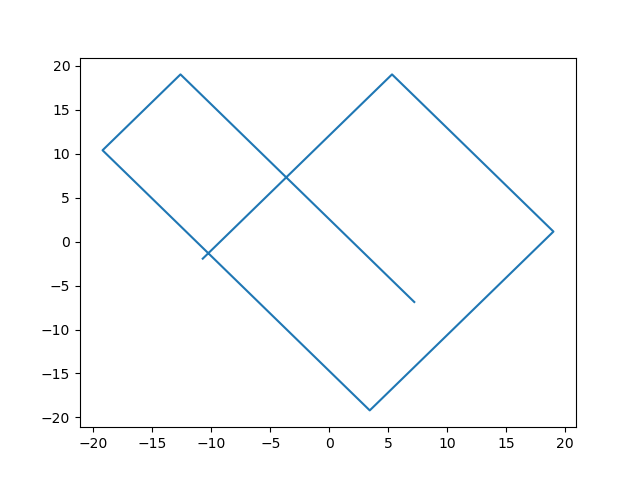

In [40]:
#Para realizar la visualización pero mal hecho
plt.figure()
plt.plot(Particles[0].rVector[:,0],Particles[0].rVector[:,1]) #Graficar toda la columna 0 y toda la columna 1, es decir, x e y

In [41]:
#La reducción lo que hace es que en lugar de tomar muchas fotos seguidas, se toma una foto cada n-dt, es decir, de forma mas espaciada

def ReduceTime(t,factor):
    
    for p in Particles:
        
        p.ReduceSize(factor)
        
    Newt = []
    
    for i in range(len(t)):
        
        if i%factor == 0:
            
            Newt.append(t[i])
            
    return np.array(Newt)

In [42]:
redt = ReduceTime(t,10)

<IPython.core.display.Javascript object>


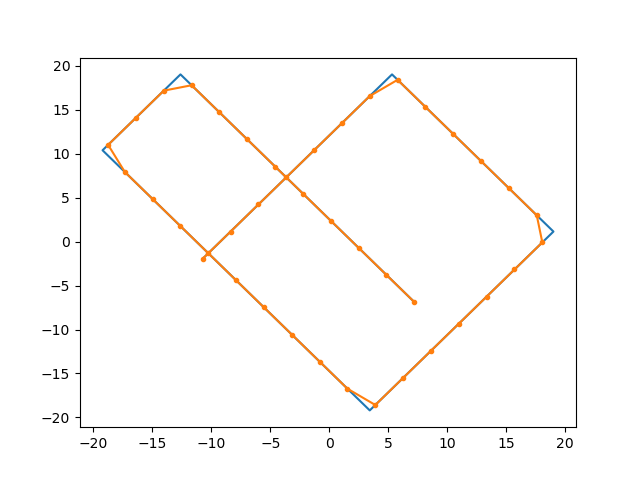

In [43]:
plt.figure()

plt.plot(Particles[0].GetPositionVector()[:,0],Particles[0].GetPositionVector()[:,1])
plt.plot(Particles[0].GetRPositionVector()[:,0],Particles[0].GetRPositionVector()[:,1], marker = '.')

<IPython.core.display.Javascript object>


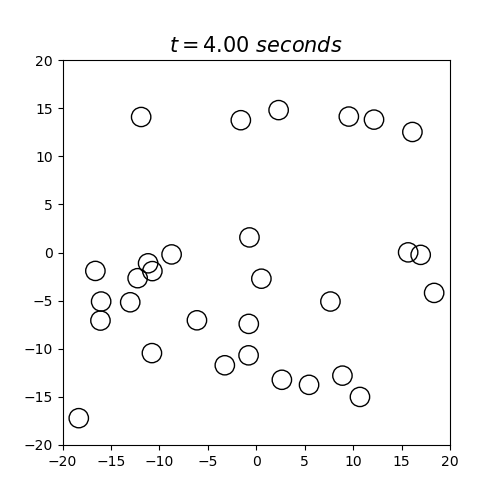

In [44]:
#Para realizar animaciones

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)

#Función de inicio

def init():  #Ajusta la escala de los ejes
    
    ax.set_xlim(-limits[0],limits[0])
    ax.set_ylim(-limits[1],limits[1])
    
#Función de actualización

def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=15) #Ubica el título
    
    for p in Particles:
        
        x = p.GetRPositionVector()[i,0]
        y = p.GetRPositionVector()[i,1]
        
        vx = p.GetVelocityVector()[i,0]
        vy = p.GetVelocityVector()[i,1]
        
        circle = plt.Circle((x,y), p.GetR(), color='k', fill = False)
        plot = ax.add_patch(circle)
        #plot = ax.arrow(x, y, vx, vy, color='r', head_width=0.5)    #Flecha de velocidad
        
    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)

In [ ]:
#Para guardar en un gift
Writer = anim.
writergif = anim.PollowWriter(fps=30)
Animation.save('Fa')